# Data Visualization and EDA

After cleaning and wrangling the data, we are left with 55 columns and ~48k listings. The missing values have been filled in with appropriate values and unnecessary/redundant data has been eliminated.
The most crucial step is visaluzing the data. That is the first step towards understanding the data and proceeding with further analysis. First we need to identify the underlying patterns in the data and figure out which features are useful. We can start with univariate analysis - looking at distribution of one variable at a time, and then follow it up with bivariate and multivariate analyses. As we go along, our understanding of the data will get deeper and we can ask more interesting questions.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date 
%matplotlib inline
sns.set(style="whitegrid")

In [2]:
data=pd.read_csv('airbnb_data_cleaned.csv')
pd.options.display.max_columns = 100

In [3]:
data.describe()

,neighborhood_overview,transit,access,interaction,house_rules,host_id,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,zipcode,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
count,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,4.835300e+04,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,4.835300e+04,48353.000000,48353.000000,48353.000000,48353.00000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000
mean,0.616239,0.637665,0.588505,0.573760,0.607160,5.400411e+07,0.515789,0.168697,12.085124,0.998283,0.529957,10660.978347,40.729708,-73.953895,0.831469,2.895250,1.143817,1.181271,1.559552,152.509255,182.499514,51.770397,1.518086,14.199946,6.832647,4.590535e+04,7.718404,21.089343,35.273489,125.33911,22.402933,72.603685,7.424317,7.166319,7.525593,7.540732,7.340723,7.242591,0.349348,0.024363,0.026968,1.140344
std,0.486306,0.480680,0.492110,0.494535,0.488387,6.292731e+07,0.479093,0.374488,92.865347,0.041396,0.499107,885.599394,0.053399,0.043977,0.374341,1.900923,0.438751,0.756892,1.093389,228.889926,433.378901,56.736500,1.140437,23.643454,18.443448,9.766875e+06,9.559070,21.436520,34.181800,138.23637,41.356287,39.950195,4.091406,3.994289,4.134288,4.135037,4.047446,4.011118,0.476769,0.154173,0.161993,1.605117
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.571000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,10001.000000,40.499794,-74.240843,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,6.736799e+06,0.000000,0.000000,1.000000,1.000000,0.000000,10023.000000,40.691166,-73.983690,1.000000,2.000000,1.000000,1.000000,1.000000,70.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.900000e+01,0.000000,0.000000,0.000000,0.00000,1.000000,78.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,0.000000,0.000000,0.000000,0.050000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,2.535800e+07,0.780000,0.000000,1.000000,1.000000,1.000000,11103.000000,40.724234,-73.956876,1.000000,2.000000,1.000000,1.000000,1.000000,110.000000,0.000000,40.000000,1.000000,0.000000,3.000000,1.124000e+03,3.000000,15.000000,29.000000,65.00000,5.000000,94.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.000000,0.000000,0.000000,0.410000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,8.047868e+07,1.000000,0.000000,2.000000,1.000000,1.000000,11221.000000,40.763392,-73.938552,1.000000,4.000000,1.000000,1.000000,2.000000,179.000000,200.000000,80.000000,2.000000,25.000000,5.000000,1.125000e+03,14.000000,40.000000,69.000000,266.00000,24.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.000000,0.000000,1.670000
max,1.000000,1.000000,1.000000,1.000000,1.000000,2.293051e+08,1.000000,1.000000,2310.000000,1.000000,1.000000,112208.000000,40.911708,-73.710233,1.000000,16.000000,16.500000,14.000000,40.000000,10000.000000,5100.000000,1000.000000,16.000000,300.000000,1250.000000,2.147484e+09,30.000000,60.000000,90.000000,365.00000,571.

## Univariate Analysis

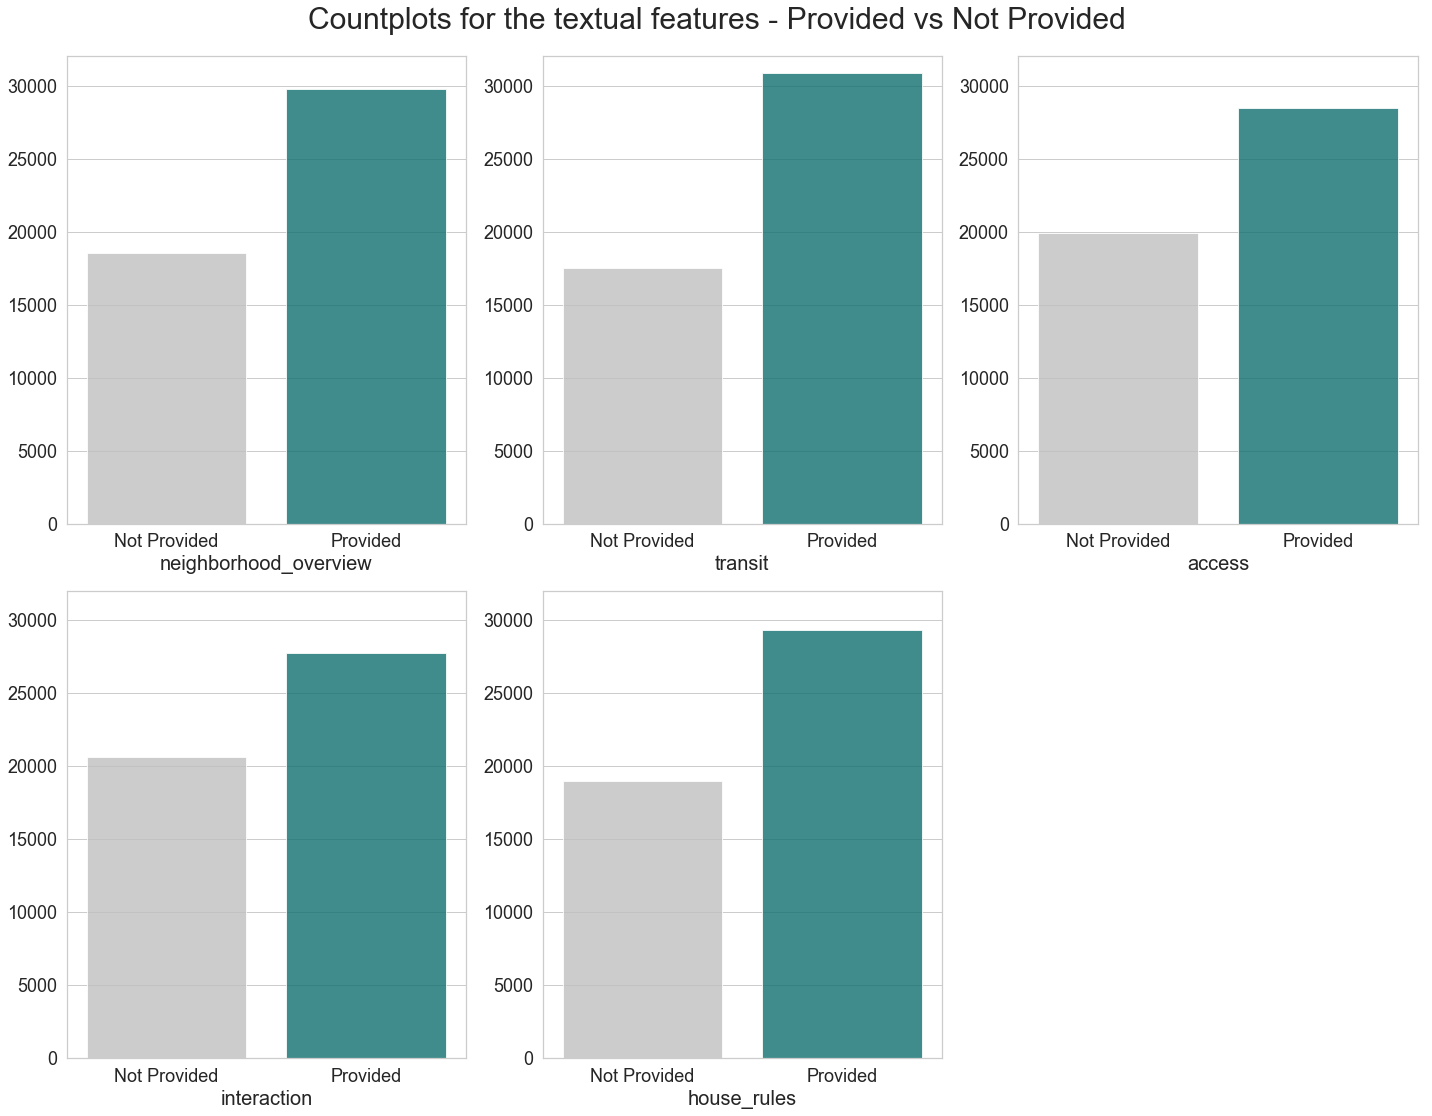

In [4]:
fig, ((ax1, ax2, ax3),(ax4, ax5,ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(20,15))
axes=[ax1,ax2,ax3,ax4,ax5]
columns=['neighborhood_overview', 'transit', 'access', 'interaction','house_rules']

st = fig.suptitle("Countplots for the textual features - Provided vs Not Provided", fontsize=30)

for i in range(5):
    _=sns.countplot(x=columns[i], data=data, palette=["silver", "teal"], alpha=0.8, ax=axes[i])
    _.set(xticklabels=['Not Provided','Provided'])
    _.set_ylim(0,32000)
    _.set_xlabel(columns[i],fontsize=20)
    _.yaxis.label.set_visible(False)
    _.tick_params(axis = 'both', labelsize = 18)

st.set_y(1.03)
fig.subplots_adjust(top=0.80)
ax6.axis('off')   
plt.tight_layout()

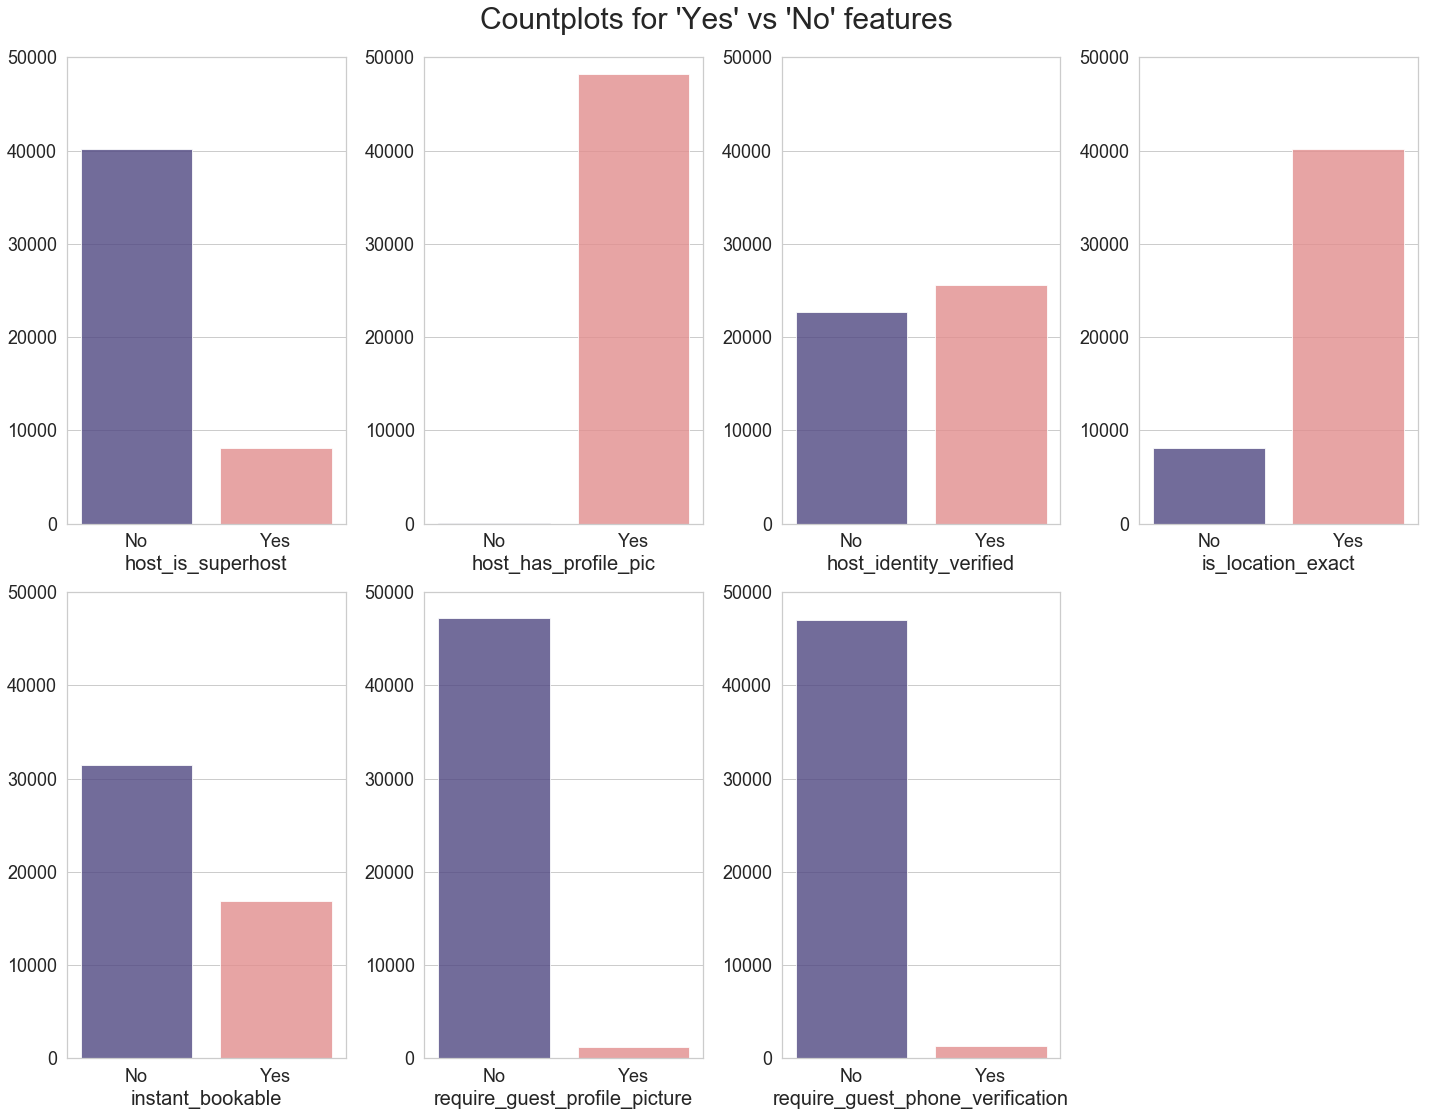

In [5]:
fig, ((ax1, ax2, ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(nrows=2, ncols=4, figsize=(20,15))
axes=[ax1,ax2,ax3,ax4,ax5,ax6,ax7]
columns=['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','instant_bookable',
        'require_guest_profile_picture','require_guest_phone_verification']

st = fig.suptitle("Countplots for 'Yes' vs 'No' features", fontsize=30)

for i in range(7):
    _=sns.countplot(x=columns[i], data=data, palette=["darkslateblue", "lightcoral"], alpha=0.8, ax=axes[i])
    _.set(xticklabels=['No','Yes'])
    _.set_ylim(0,50000)
    _.set_xlabel(columns[i],fontsize=20)
    _.yaxis.label.set_visible(False)
    _.tick_params(axis = 'both', labelsize = 18)
    
st.set_y(1.03)
fig.subplots_adjust(top=0.80)
ax8.axis('off')   
plt.tight_layout()


**Based on the Yes/No countplots above, we can conclude the following:**
> The host_has_profile_pic has almost all values as 'Yes'. This could suggest that having a profile picture is mandatory for hosts on Airbnb to create listings.<br>
Also, in most cases the guest profile picture of guest phone verification are not required. Airbnb probably doesn't want their customers feel they have to follow some mandatory rules and thus keeps these requirements linient for its customers.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


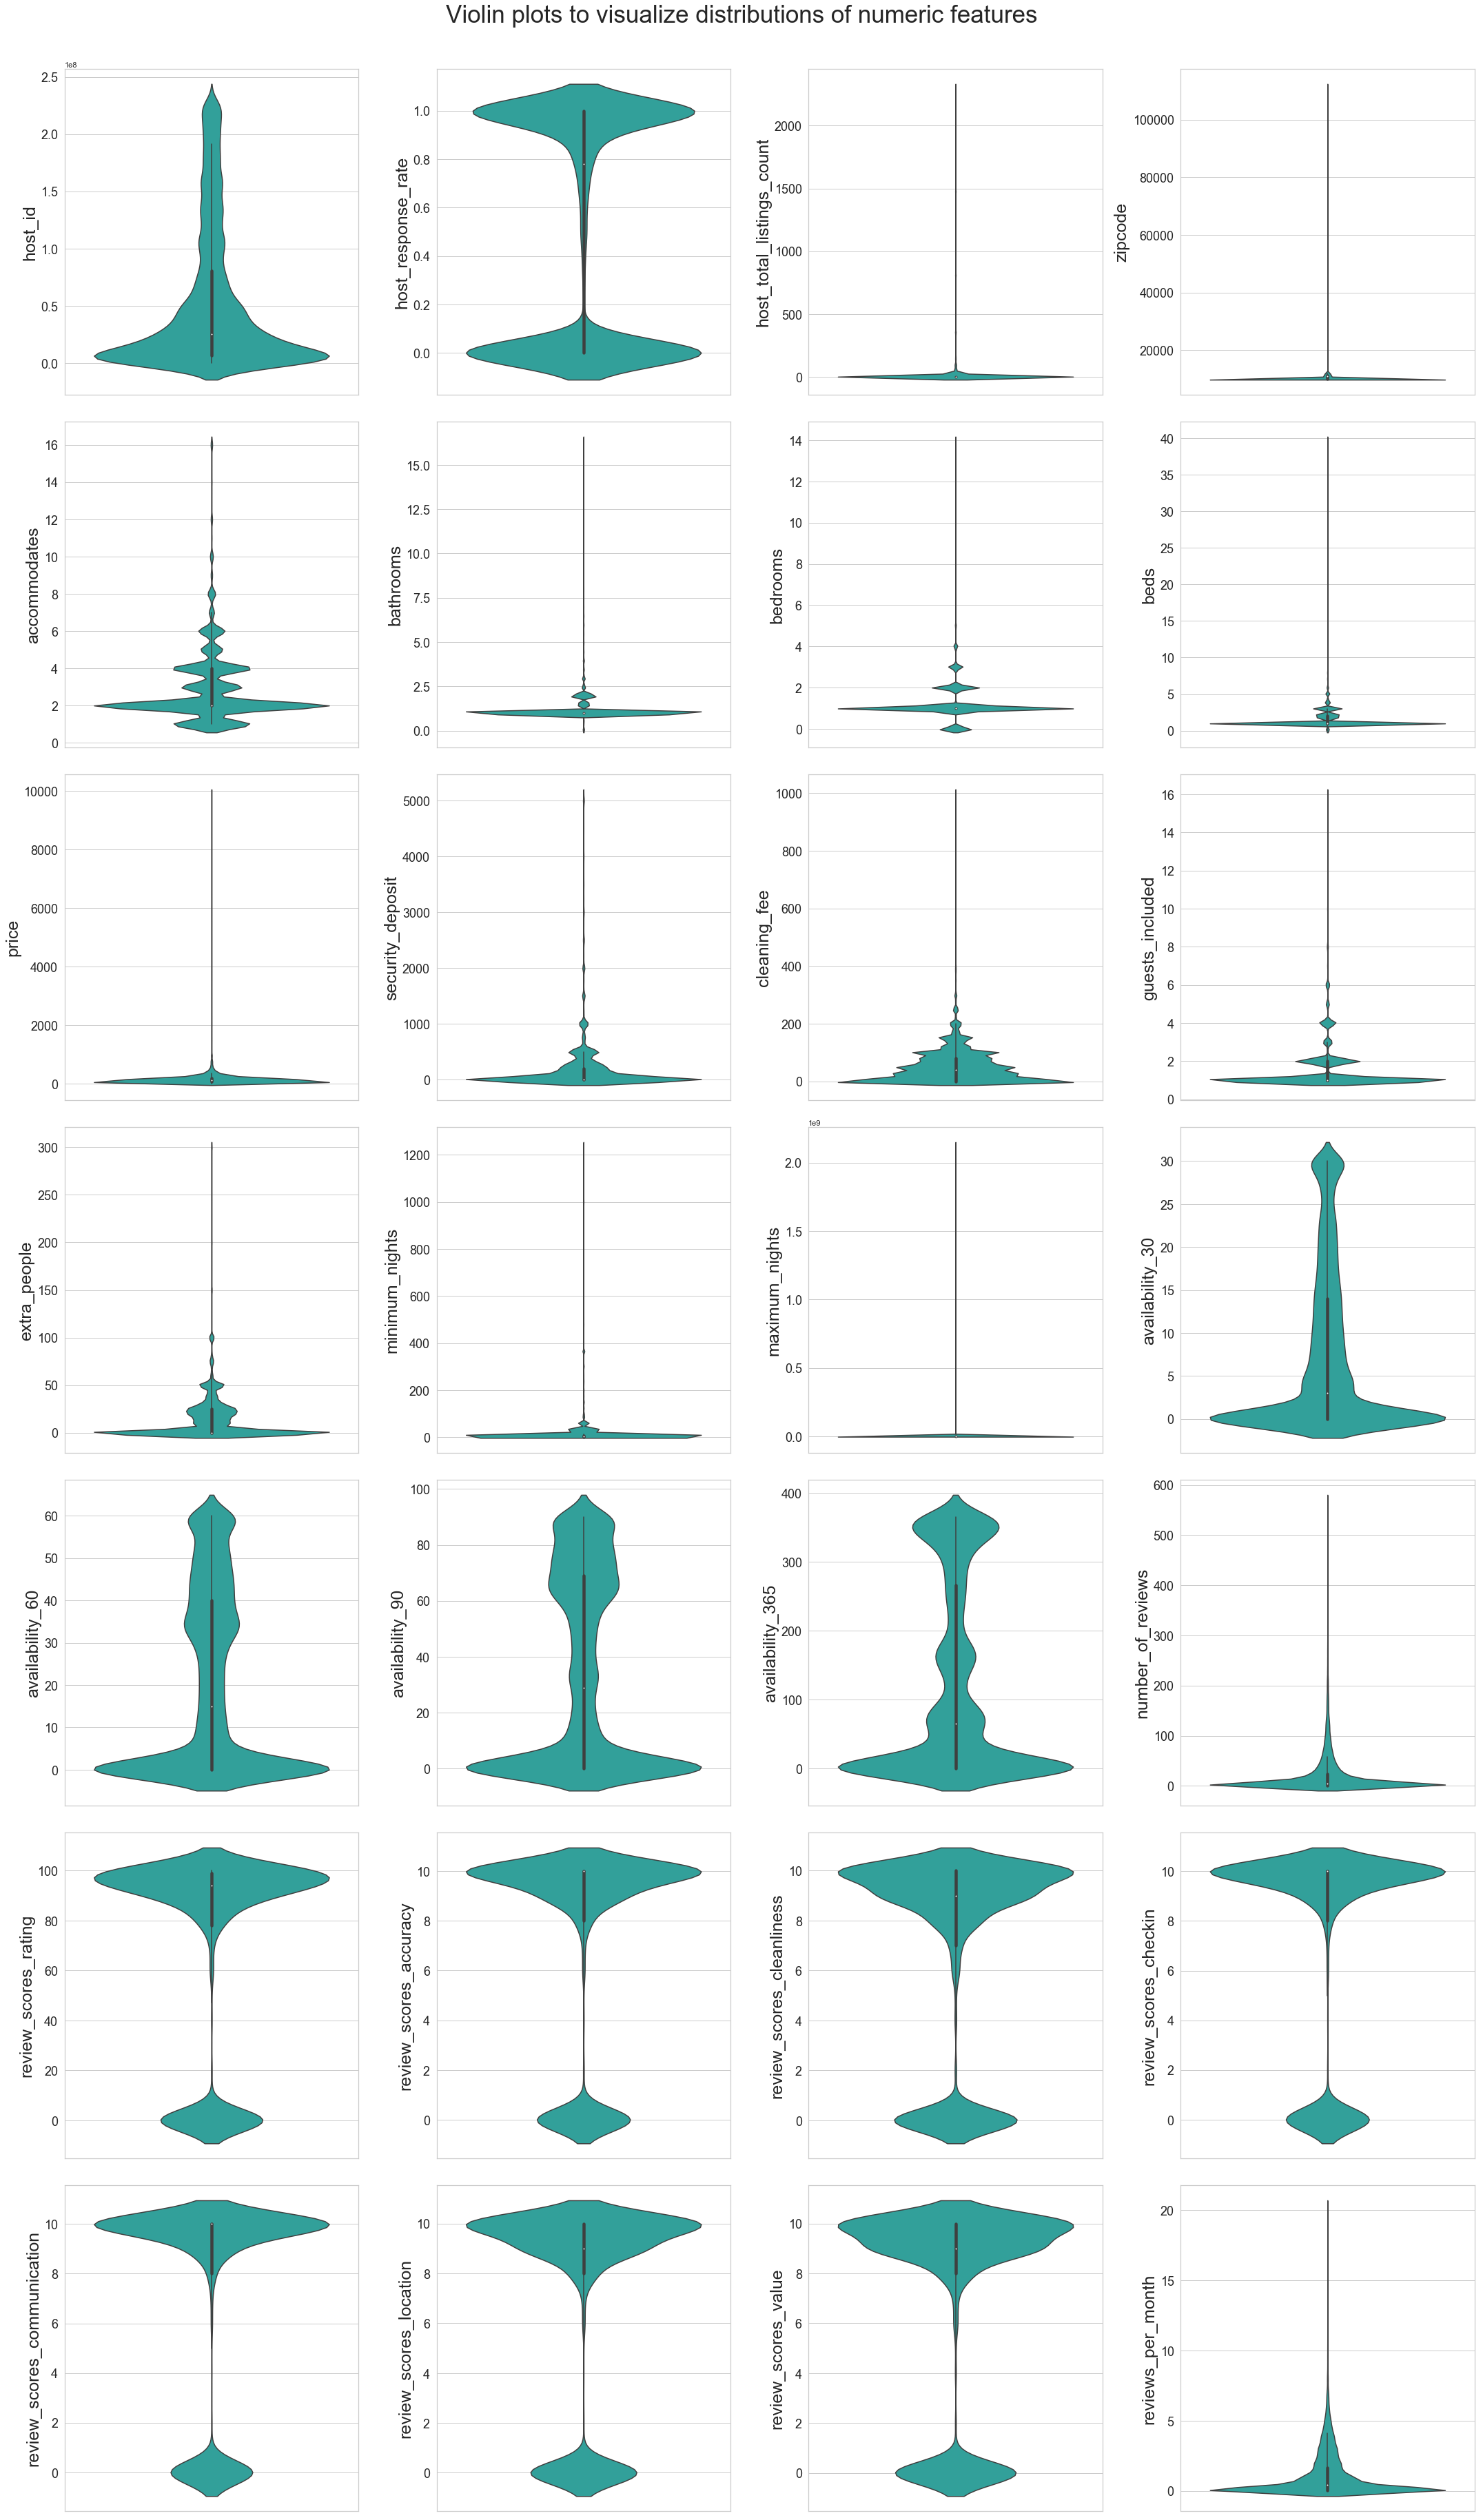

In [6]:
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8),(ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16),(ax17,ax18,ax19,ax20),
      (ax21,ax22,ax23,ax24),(ax25,ax26,ax27,ax28)) = plt.subplots(nrows=7, ncols=4, figsize=(30,50))

axes=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16,ax17,ax18,ax19,ax20,ax21,ax22,ax23,
      ax24,ax25,ax26,ax27,ax28]
columns=['host_id','host_response_rate','host_total_listings_count','zipcode','accommodates','bathrooms',
         'bedrooms','beds','price','security_deposit','cleaning_fee','guests_included','extra_people',
         'minimum_nights','maximum_nights','availability_30','availability_60','availability_90','availability_365',
         'number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
         'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value',
         'reviews_per_month']

st = fig.suptitle("Violin plots to visualize distributions of numeric features", fontsize=35)

for i in range(28):
    _=sns.violinplot(y=columns[i], data=data, ax=axes[i],  alpha=0.8,  color='lightseagreen')
    _.set_ylabel(columns[i],fontsize=25)
    _.tick_params(labelsize = 18)
    
st.set_y(1.02)
fig.subplots_adjust(top=0.80)
plt.tight_layout()

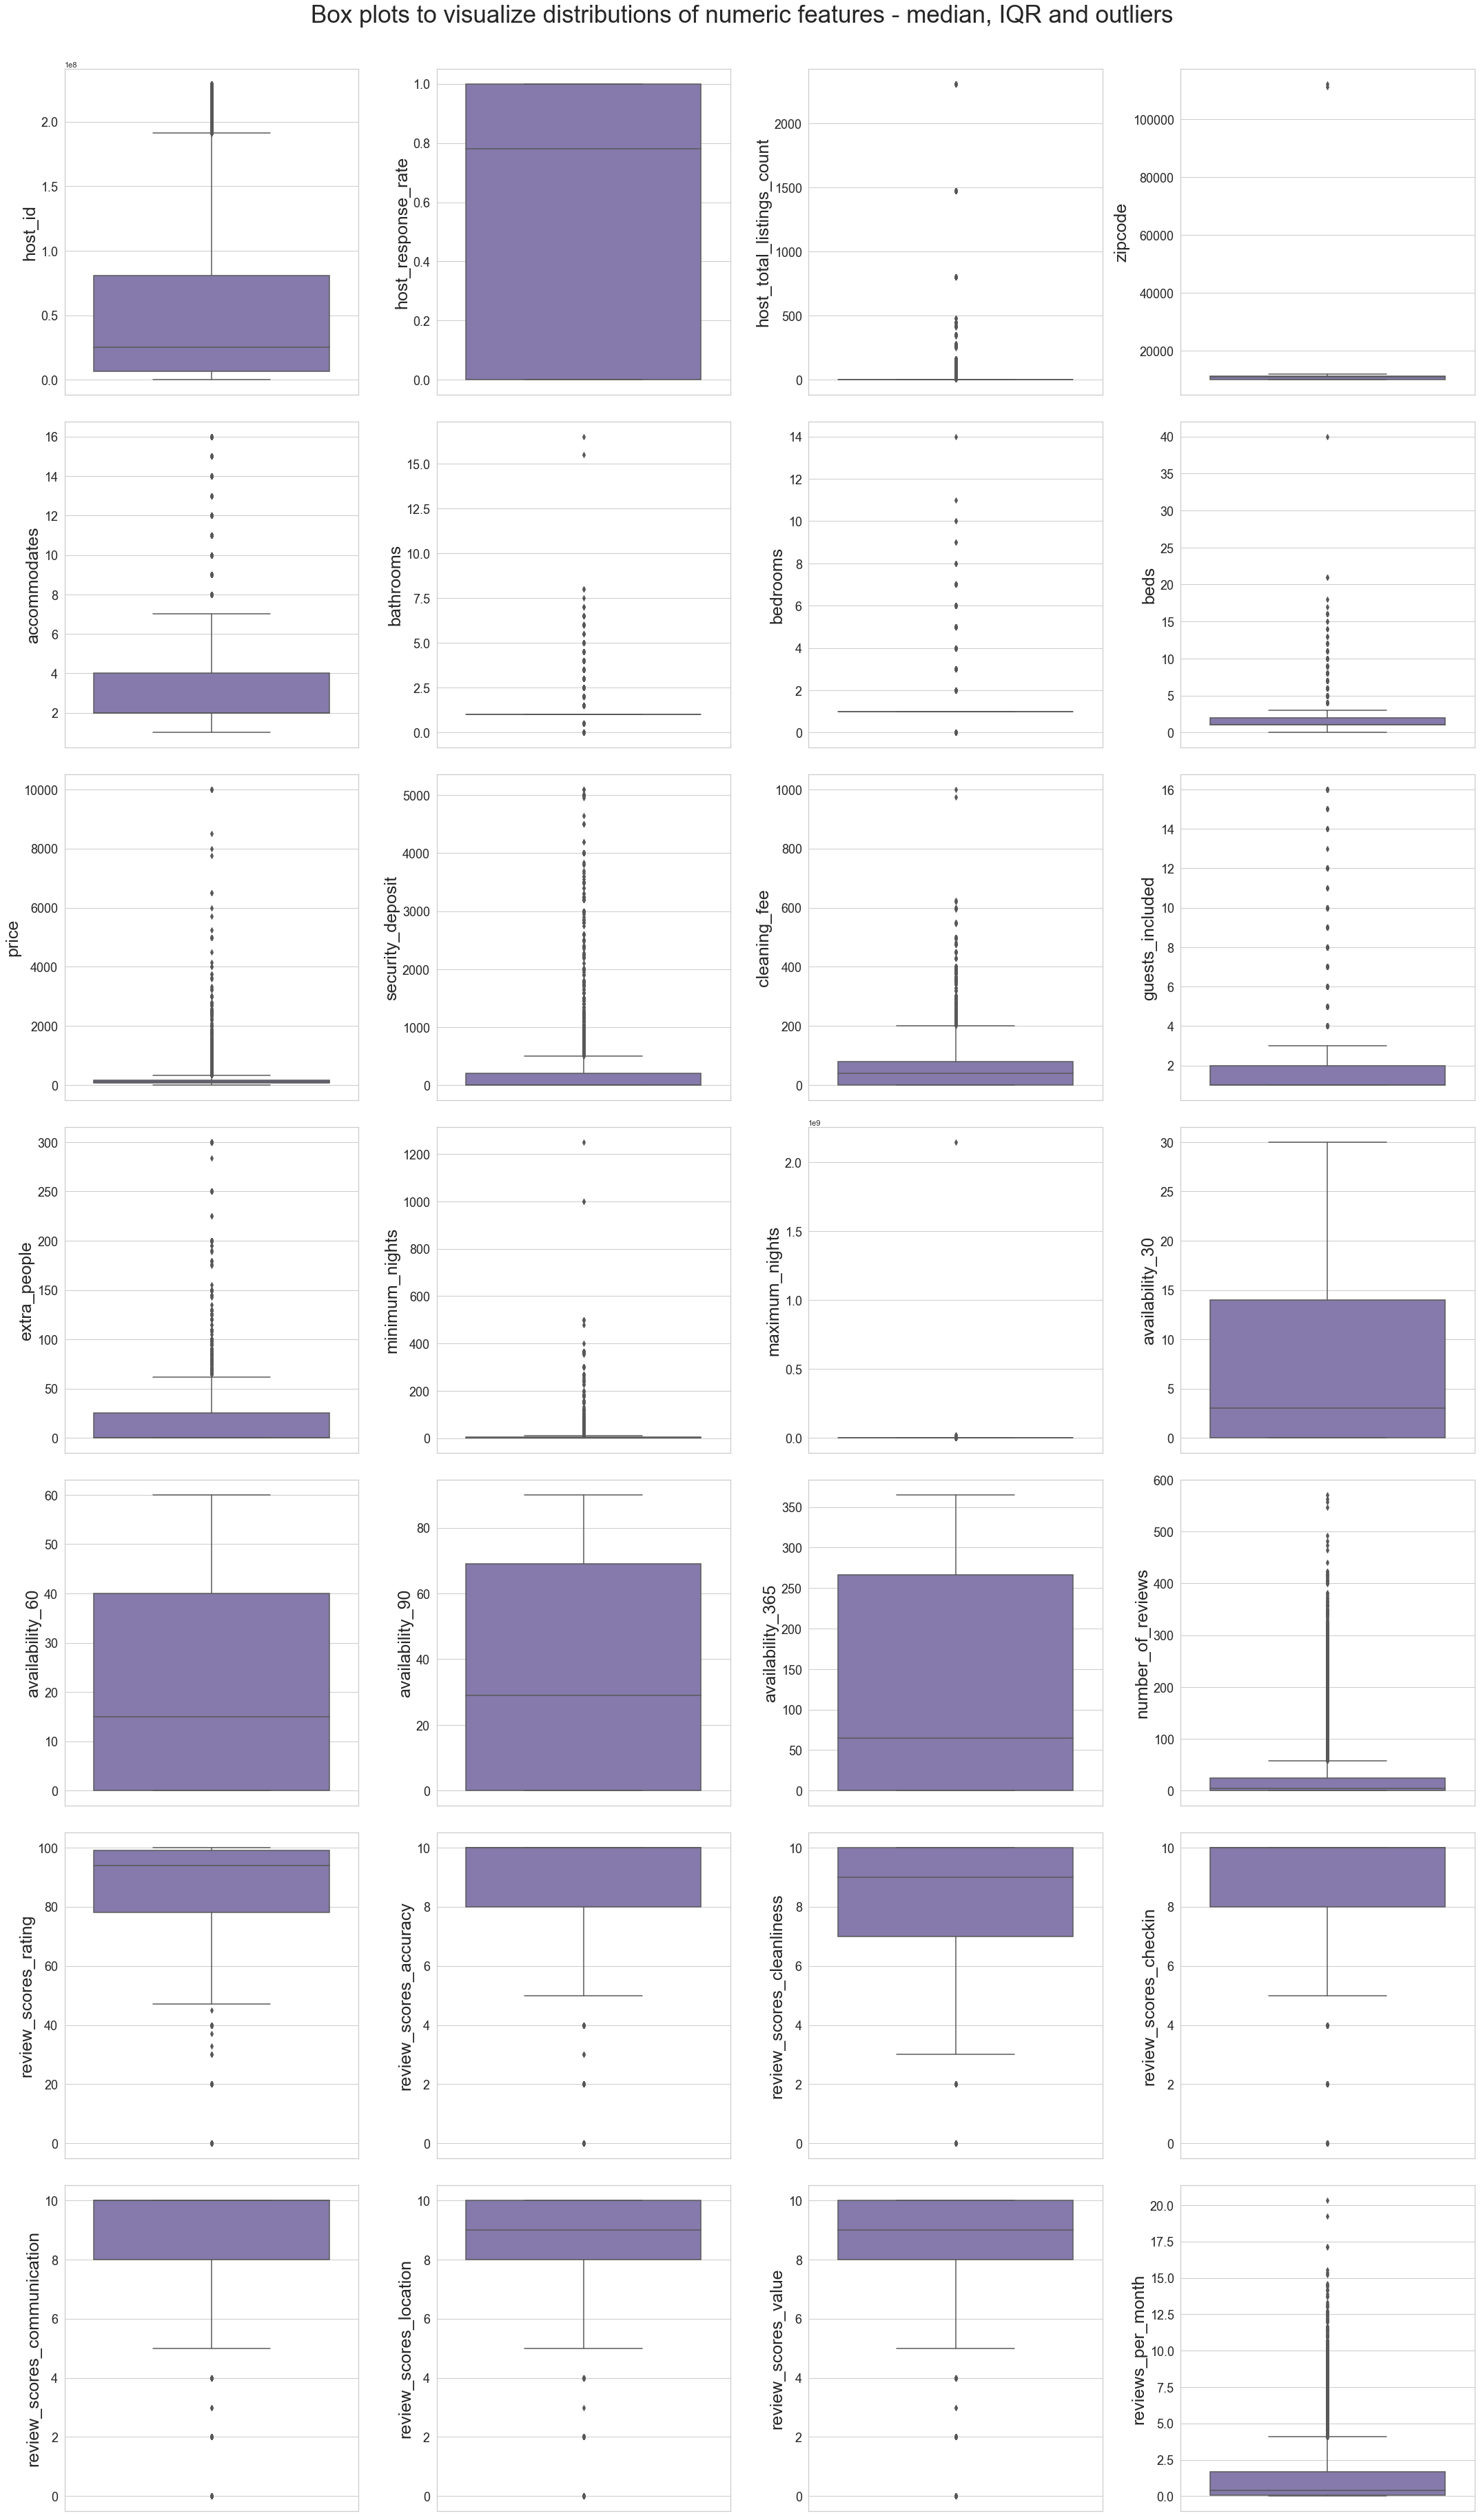

In [7]:
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8),(ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16),(ax17,ax18,ax19,ax20),
      (ax21,ax22,ax23,ax24),(ax25,ax26,ax27,ax28)) = plt.subplots(nrows=7, ncols=4, figsize=(30,50))

axes=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16,ax17,ax18,ax19,ax20,ax21,ax22,ax23,
      ax24,ax25,ax26,ax27,ax28]
columns=['host_id','host_response_rate','host_total_listings_count','zipcode','accommodates','bathrooms',
         'bedrooms','beds','price','security_deposit','cleaning_fee','guests_included','extra_people',
         'minimum_nights','maximum_nights','availability_30','availability_60','availability_90','availability_365',
         'number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
         'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value',
         'reviews_per_month']

st = fig.suptitle("Box plots to visualize distributions of numeric features - median, IQR and outliers", fontsize=35)

for i in range(28):
    _=sns.boxplot(y=columns[i], data=data, ax=axes[i], color='m')
    _.set_ylabel(columns[i],fontsize=25)
    _.tick_params(labelsize = 18)
    
st.set_y(1.02)
fig.subplots_adjust(top=0.80)
plt.tight_layout()

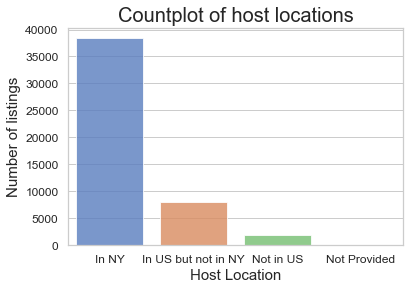

In [8]:
plt.title('Countplot of host locations', fontsize=20)
sns.countplot(x='host_location',data=data, palette='muted', alpha=0.8)
plt.xlabel('Host Location', fontsize=15)
plt.ylabel('Number of listings', fontsize=15)
plt.tick_params(labelsize = 12)

* **The hosts for most of the listings are located in NY. It's more favorable to have the host in the same city as the property listed to keep the logistics umcomplicated.**

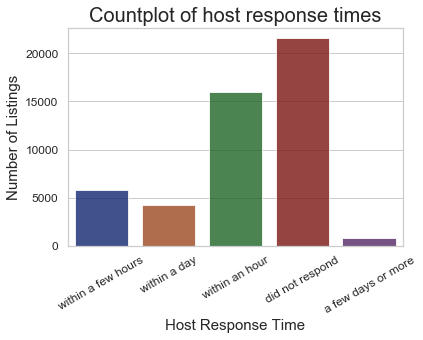

In [9]:
plt.title('Countplot of host response times', fontsize=20)
sns.countplot(x='host_response_time',data=data, palette='dark', alpha=0.8)
plt.xticks(rotation=30)
plt.xlabel('Host Response Time', fontsize=15)
plt.ylabel('Number of Listings', fontsize=15)
plt.tick_params(labelsize = 12)

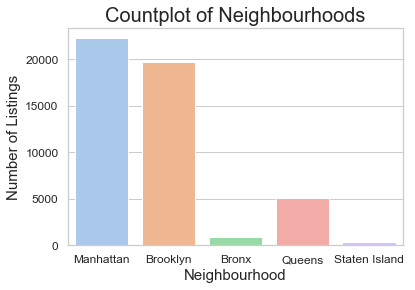

In [10]:
plt.title('Countplot of Neighbourhoods', fontsize=20)
sns.countplot(x='neighbourhood_group_cleansed',data=data, palette='pastel')
plt.xlabel('Neighbourhood', fontsize=15)
plt.ylabel('Number of Listings', fontsize=15)
plt.tick_params(labelsize = 12)

* **A majority of listings are found located in Manhattan and Brooklyn neughbourhoods, floowed by Queens. Bronx and Staten Island have very few proportion of listings relatively. <br> This could be attributed to the fact that Manhattan and Brooklyn are the most famous and happening boroughs in New York City. And the tourists would like to stay in the prime locations which are close to all the landmarks and sighseeing places.**

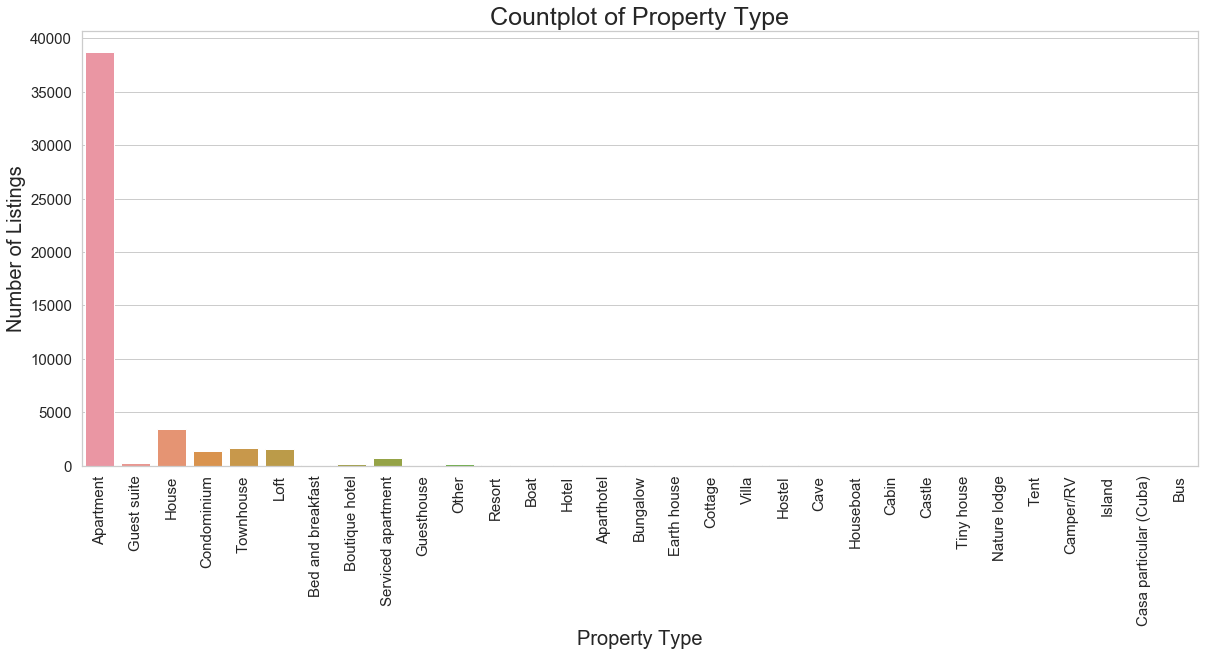

In [11]:
plt.figure(figsize=(20,8))
plt.title('Countplot of Property Type', fontsize=25)
sns.countplot(x='property_type',data=data)
plt.xticks(rotation=90)
plt.xlabel('Property Type', fontsize=20)
plt.ylabel('Number of Listings', fontsize=20)
plt.tick_params(labelsize = 15)

* **Most of the property types are composed of apartments which makes sense based on the infrastructure of NYC. A very small proportion constitute of houses, condos, townhouse, etc.**

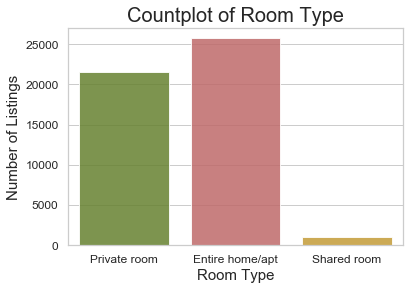

In [12]:
plt.title('Countplot of Room Type', fontsize=20)
sns.countplot(x='room_type',data=data, palette=['olivedrab','indianred','goldenrod'],alpha=0.85)
plt.xlabel('Room Type', fontsize=15)
plt.ylabel('Number of Listings', fontsize=15)
plt.tick_params(labelsize = 12)

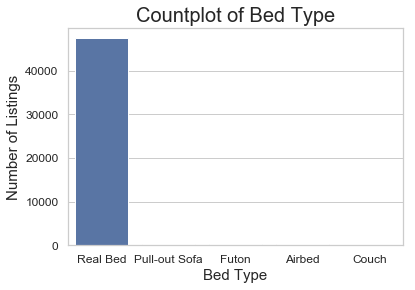

In [13]:
plt.title('Countplot of Bed Type', fontsize=20)
sns.countplot(x='bed_type',data=data)
plt.xlabel('Bed Type', fontsize=15)
plt.ylabel('Number of Listings', fontsize=15)
plt.tick_params(labelsize = 12)

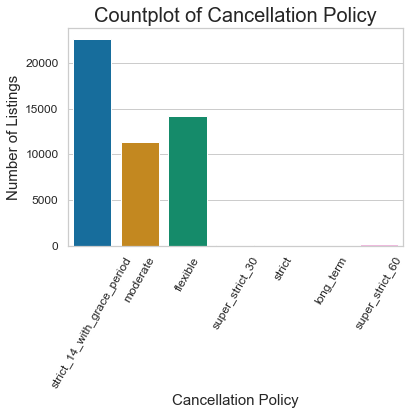

In [14]:
plt.title('Countplot of Cancellation Policy', fontsize=20)
sns.countplot(x='cancellation_policy',data=data, palette='colorblind')
plt.xticks(rotation=60)
plt.xlabel('Cancellation Policy', fontsize=15)
plt.ylabel('Number of Listings', fontsize=15)
plt.tick_params(labelsize = 12)

<BarContainer object of 128 artists>

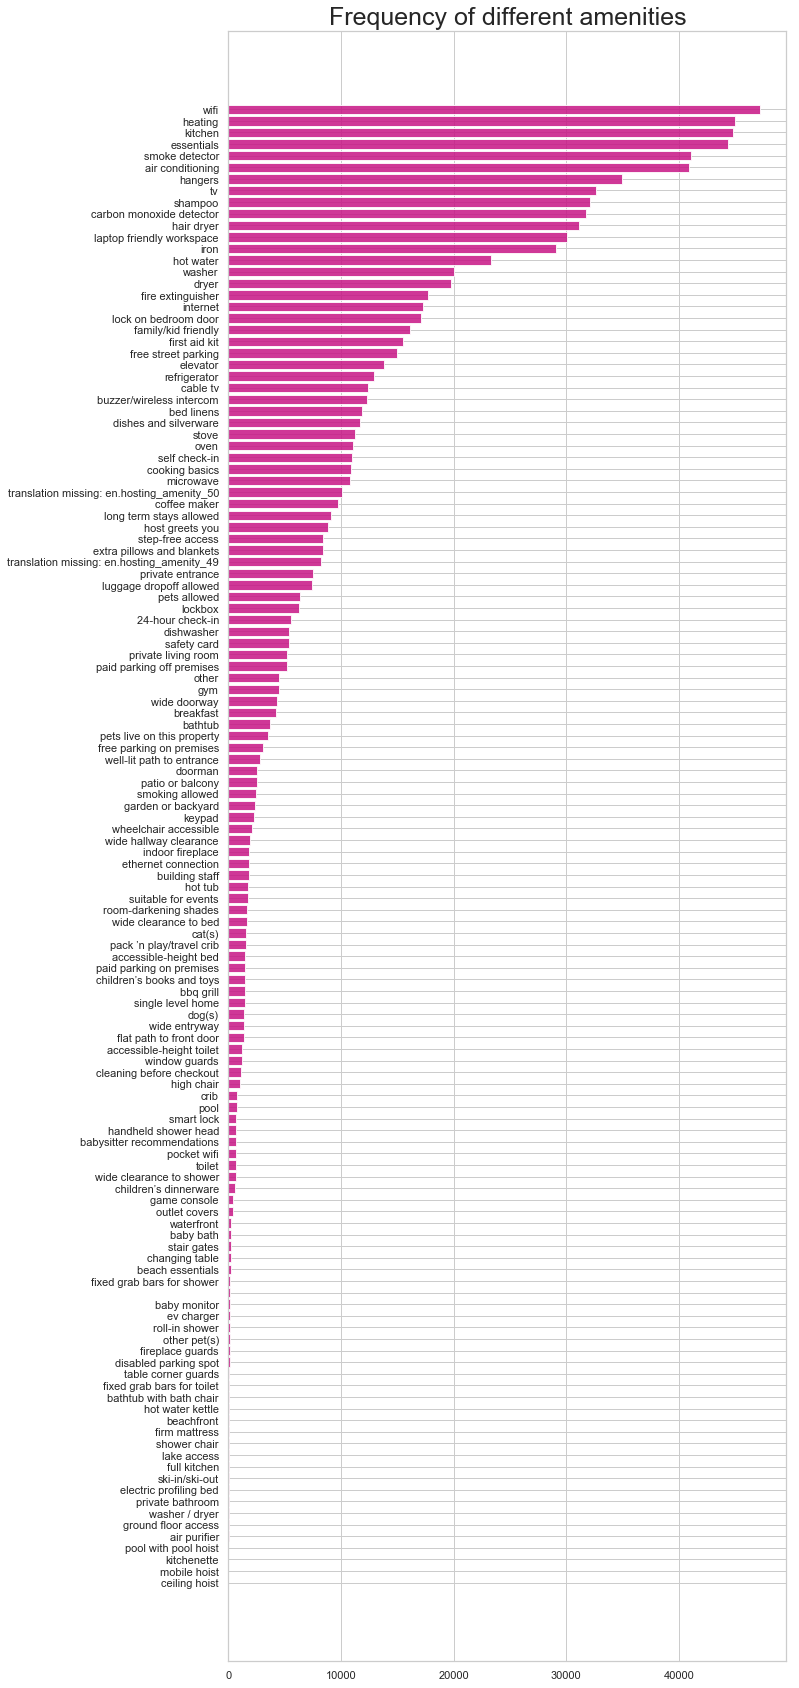

In [15]:
amenities=data['amenities']
amenities=amenities.str.strip('{}')
amenities=amenities.str.replace('\"','')
amenities=amenities.str.lower()
amenities_counts={}

for i in amenities:
    result = [x.strip() for x in i.split(',')]
    for each in result:
        if each in amenities_counts:
            amenities_counts[each]+=1
        else:
            amenities_counts[each]=1

amenity_sorted =dict ([(k, amenities_counts[k]) for k in sorted(amenities_counts, key=amenities_counts.get)])
amenity = list(amenity_sorted.keys())
amenity_count = list(amenity_sorted.values())
plt.figure(figsize=(10,30))
plt.title('Frequency of different amenities', fontsize=25)
plt.barh(range(len(amenity_sorted)),amenity_count,tick_label=amenity, color='mediumvioletred', alpha=0.85)


* **The most frequently provided amenities include:**
>Wifi <br> Heating <br> Kitchen <br> Air conditioning <br> Smoke Detector <br> TV
<br> 

These are pretty standard amenities available in most apartments.
* **A few interesting amenities provided very seldom:**
>Air Purifier <br> Ski-in/Ski-out<br>Pool with pool hoist <br>Lake Access <br> Beach Front

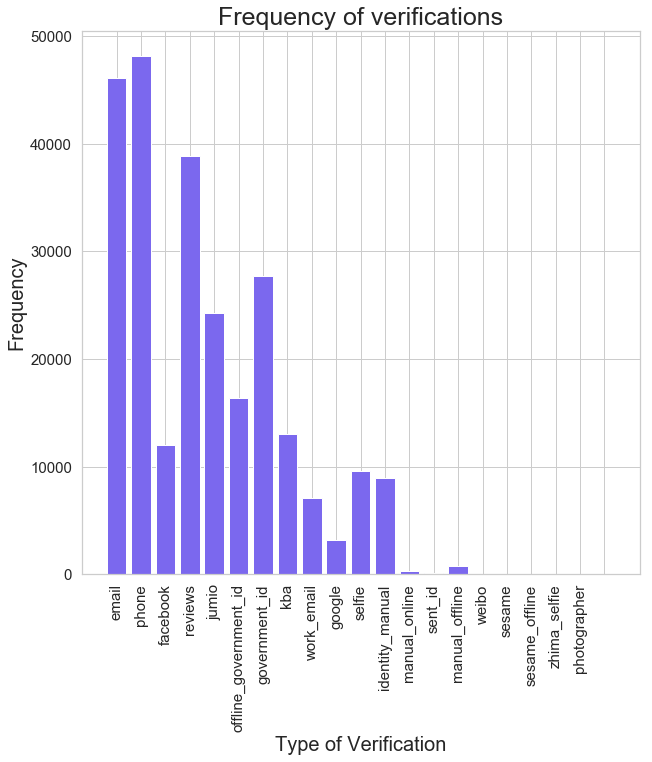

In [16]:
verifications=data['host_verifications']
verifications=verifications.str.strip('[]')
verifications=verifications.str.replace('\'','')
verifications=verifications.str.lower()

verification_counts={}
for i in verifications:
    result = [x.strip() for x in i.split(',')]
    for each in result:
        if each in verification_counts:
            verification_counts[each]+=1
        else:
            verification_counts[each]=1

verification = list(verification_counts.keys())
verification_count = list(verification_counts.values())
plt.figure(figsize=(10,10))
plt.title('Frequency of verifications', fontsize=25)
plt.bar(range(len(verification_count)),verification_count,tick_label=verification, color='mediumslateblue')
plt.xticks(rotation=90)
plt.xlabel('Type of Verification', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.tick_params(labelsize = 15)

## Bivariate Analysis

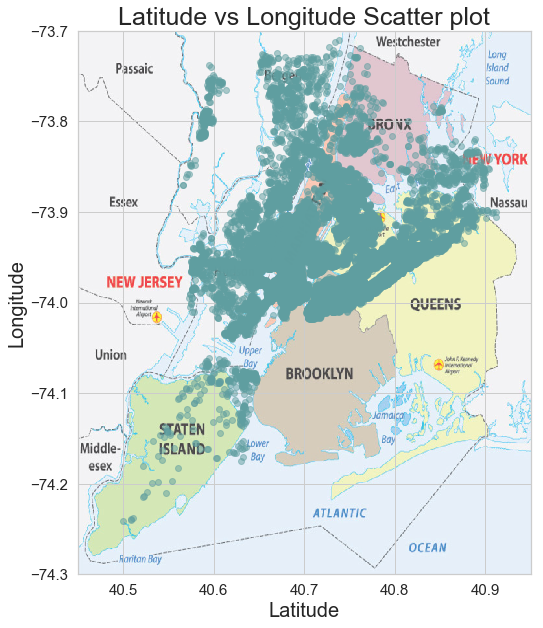

In [17]:
plt.figure(figsize=(10,10))
img = plt.imread('map2.jpg')
_=plt.imshow(img,alpha=0.8, zorder=0,extent=[40.45, 40.95, -74.3, -73.7])
_=plt.title('Latitude vs Longitude Scatter plot', fontsize=25)
_=plt.scatter(x='latitude', y='longitude', data=data, color='cadetblue', alpha=0.5, zorder=1)
_=plt.xlabel('Latitude', fontsize=20)
_=plt.ylabel('Longitude', fontsize=20)
_=plt.tick_params(labelsize = 15)
plt.show()

* **Overlaying the provided location of listings (longitude-latitude) provides a geographical viasulaization of how the properties are located in relation with others. Some parts of the city seem to have a major cluster of listings, example Manhattan. Other boroughs have sparse listings. These conclusions are in line with the distribution of properties in different boroughs of the city which we visualized earlier.**

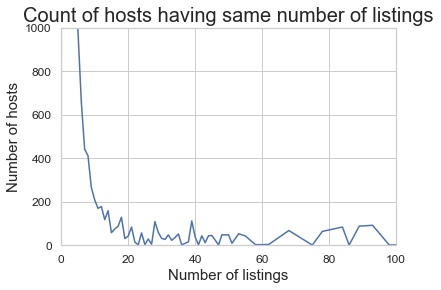

In [18]:
listing_freq=data.groupby('host_total_listings_count')['host_id'].count()
listing_freq=dict(listing_freq)

plt.title('Count of hosts having same number of listings', fontsize=20)
plt.plot(list(listing_freq.keys()), list(listing_freq.values()))
plt.xlim([0,100])
plt.ylim([0,1000])
plt.xlabel('Number of listings', fontsize=15)
plt.ylabel('Number of hosts', fontsize=15)
plt.tick_params(labelsize = 12)

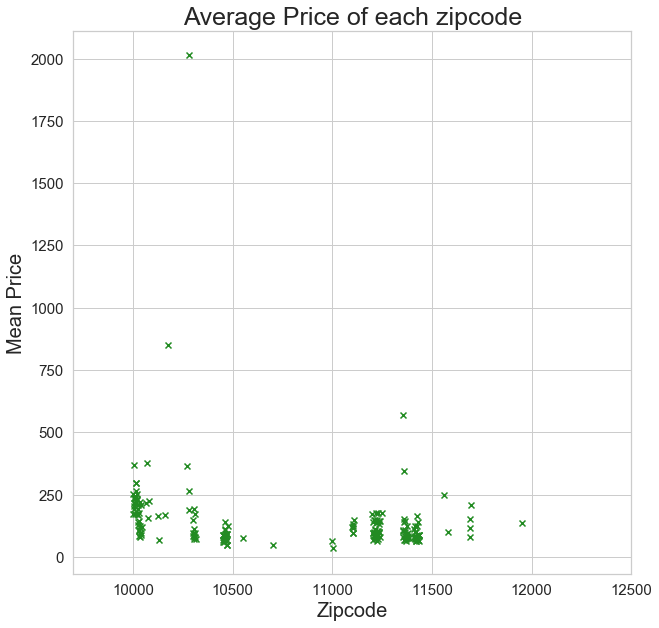

In [19]:
zipcode_price=data.groupby('zipcode')['price'].mean()
zipcode_price=dict(zipcode_price)

plt.figure(figsize=(10,10))
plt.title('Average Price of each zipcode', fontsize=25)
plt.scatter(zipcode_price.keys(), zipcode_price.values(), color='forestgreen', marker='x')
plt.xlim([9700,12500])
plt.xlabel('Zipcode', fontsize=20)
plt.ylabel('Mean Price', fontsize=20)
plt.tick_params(labelsize = 15)

Text(0,0.5,'Neighbourhood')

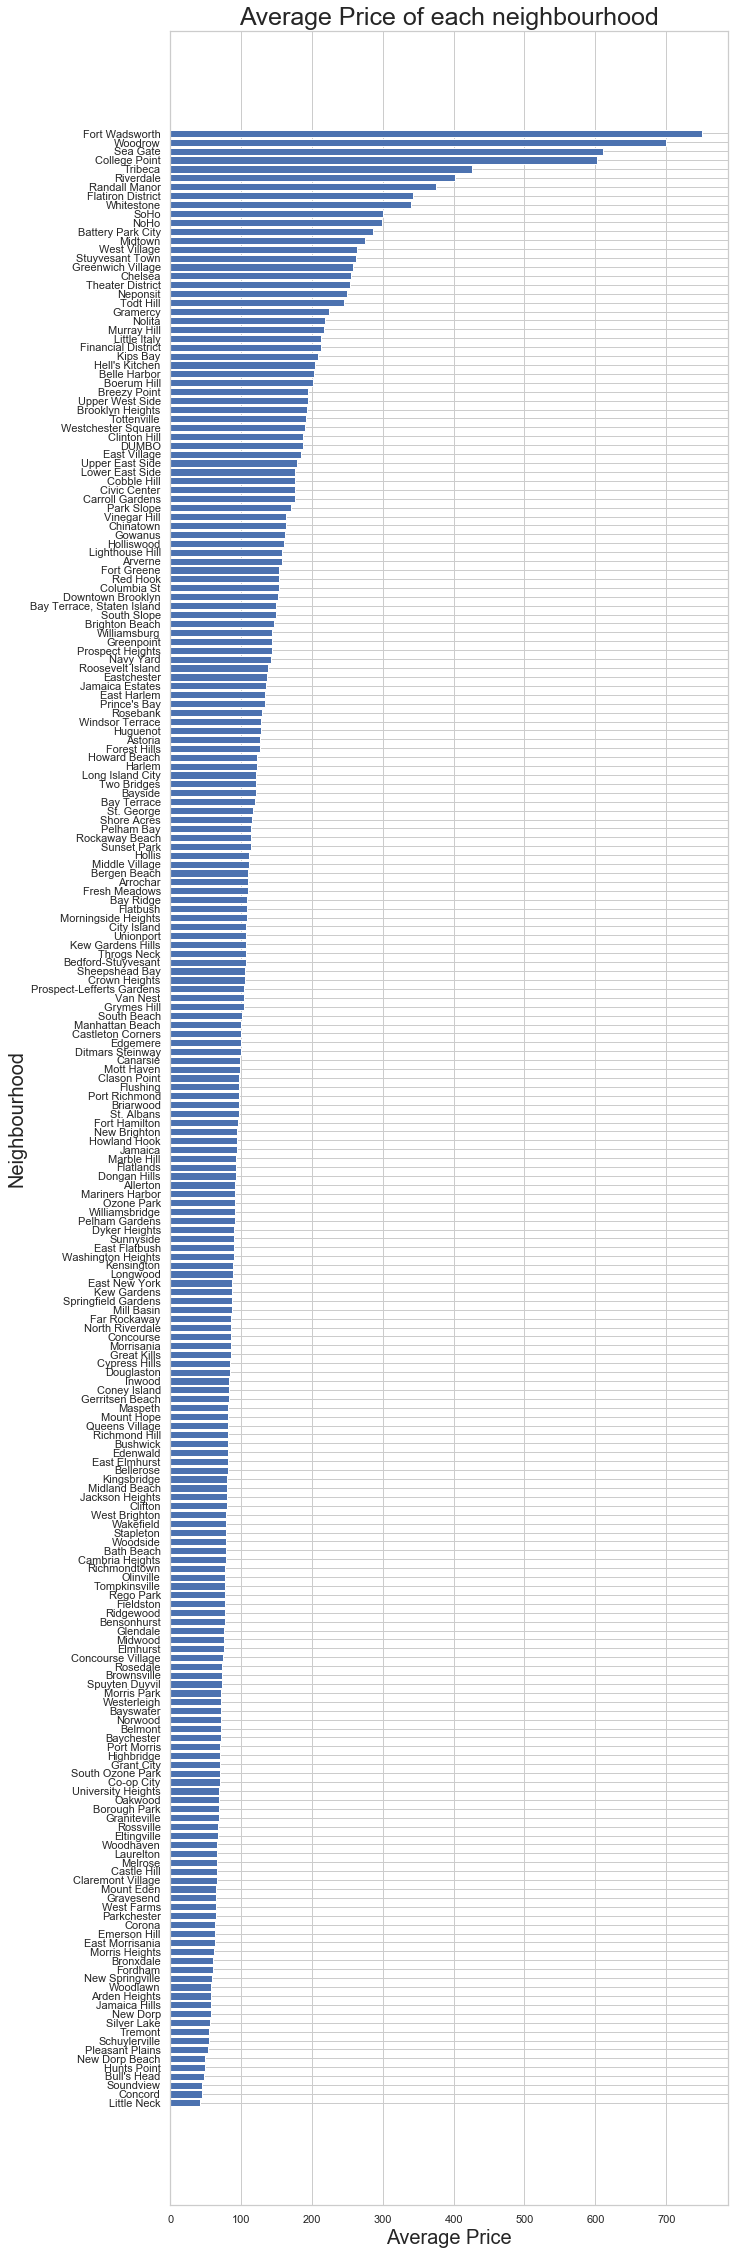

In [20]:
neighbourhood_price=data.groupby('neighbourhood_cleansed')['price'].mean()
neighbourhood_price=dict(neighbourhood_price)
nprice_sorted =dict ([(k, neighbourhood_price[k]) for k in sorted(neighbourhood_price, key=neighbourhood_price.get)])

plt.figure(figsize=(10,40))
plt.title('Average Price of each neighbourhood', fontsize=25)
plt.barh(list(nprice_sorted.keys()),list( nprice_sorted.values()))
plt.xlabel('Average Price', fontsize=20)
plt.ylabel('Neighbourhood', fontsize=20)

* **Top five neighborhoods with highest average price:**
>Fort Wadsworth <br> Woodrow <br> Sea Gate <br> College Point <br> Tribeca
<br> <br>

* **Bottom five neighborhoods with lowest average price**
>Little Neck <br> Concord <br>Soundview <br>Bull's Head <br> Hunts Point

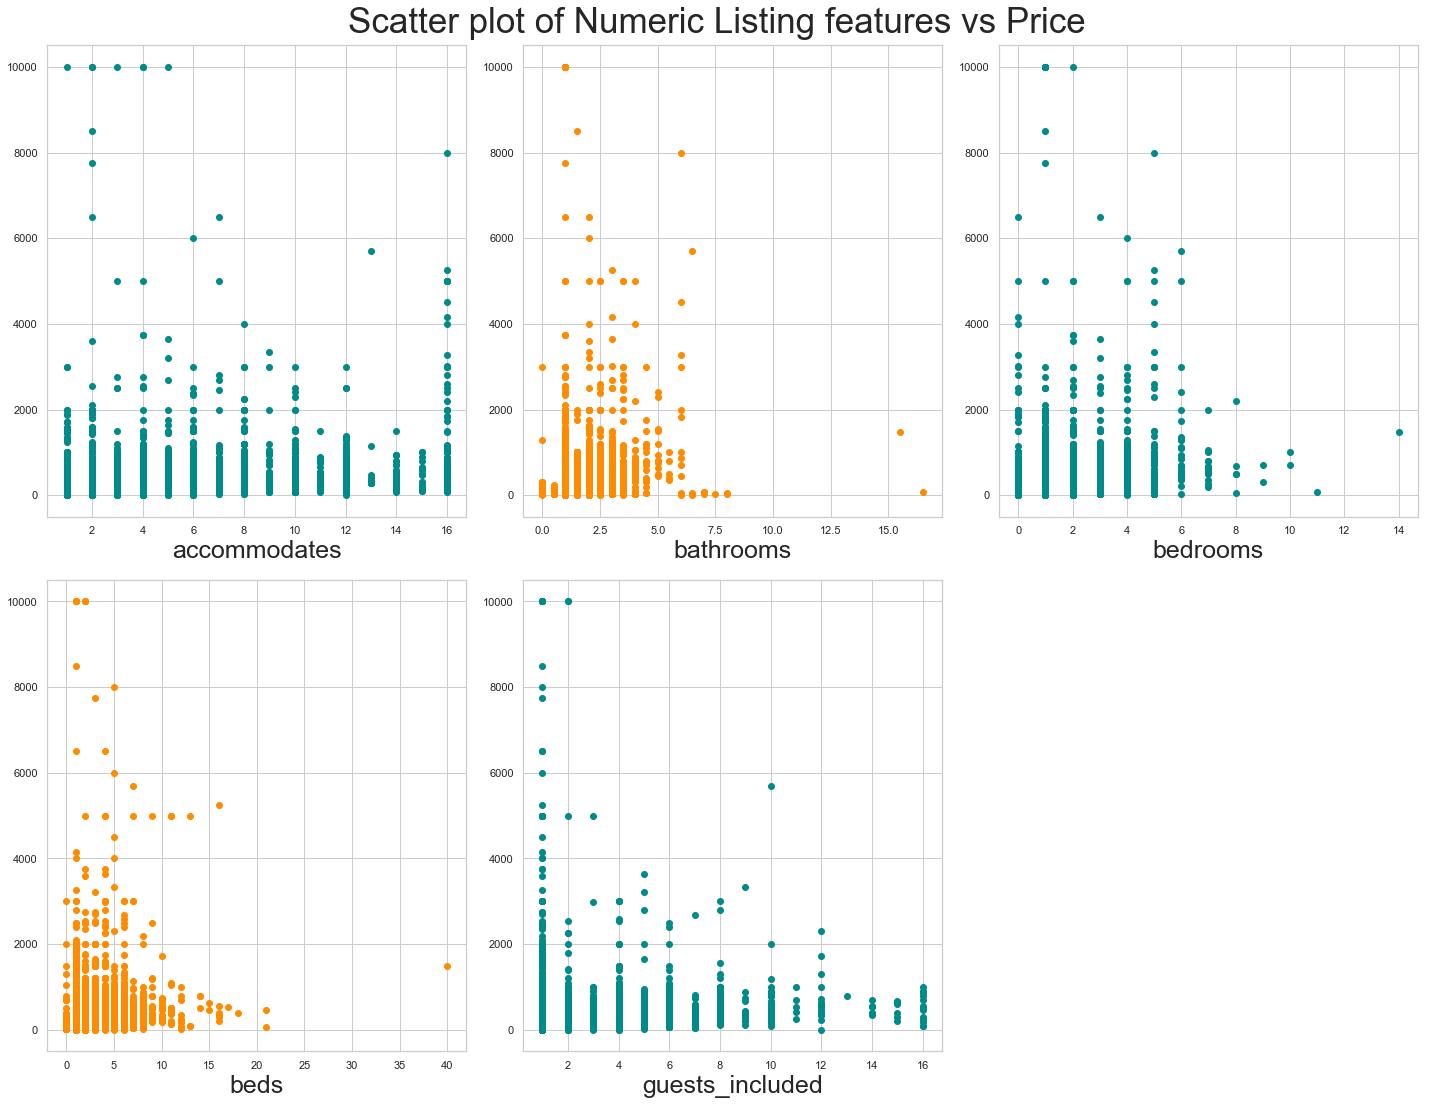

In [21]:
fig, ((ax1, ax2, ax3),(ax4, ax5,ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(20,15))
axes=[ax1,ax2,ax3,ax4,ax5]
columns=['accommodates','bathrooms','bedrooms','beds','guests_included']
colors=['darkcyan','darkorange','darkcyan','darkorange','darkcyan']
st = fig.suptitle("Scatter plot of Numeric Listing features vs Price", fontsize=35)

for i in range(5):
    axes[i].scatter(x=columns[i], y='price', data=data,color=colors[i])
    axes[i].set_xlabel(columns[i],fontsize=25)
    
st.set_y(1.02)
fig.subplots_adjust(top=0.80)
ax6.axis('off')   
plt.tight_layout()

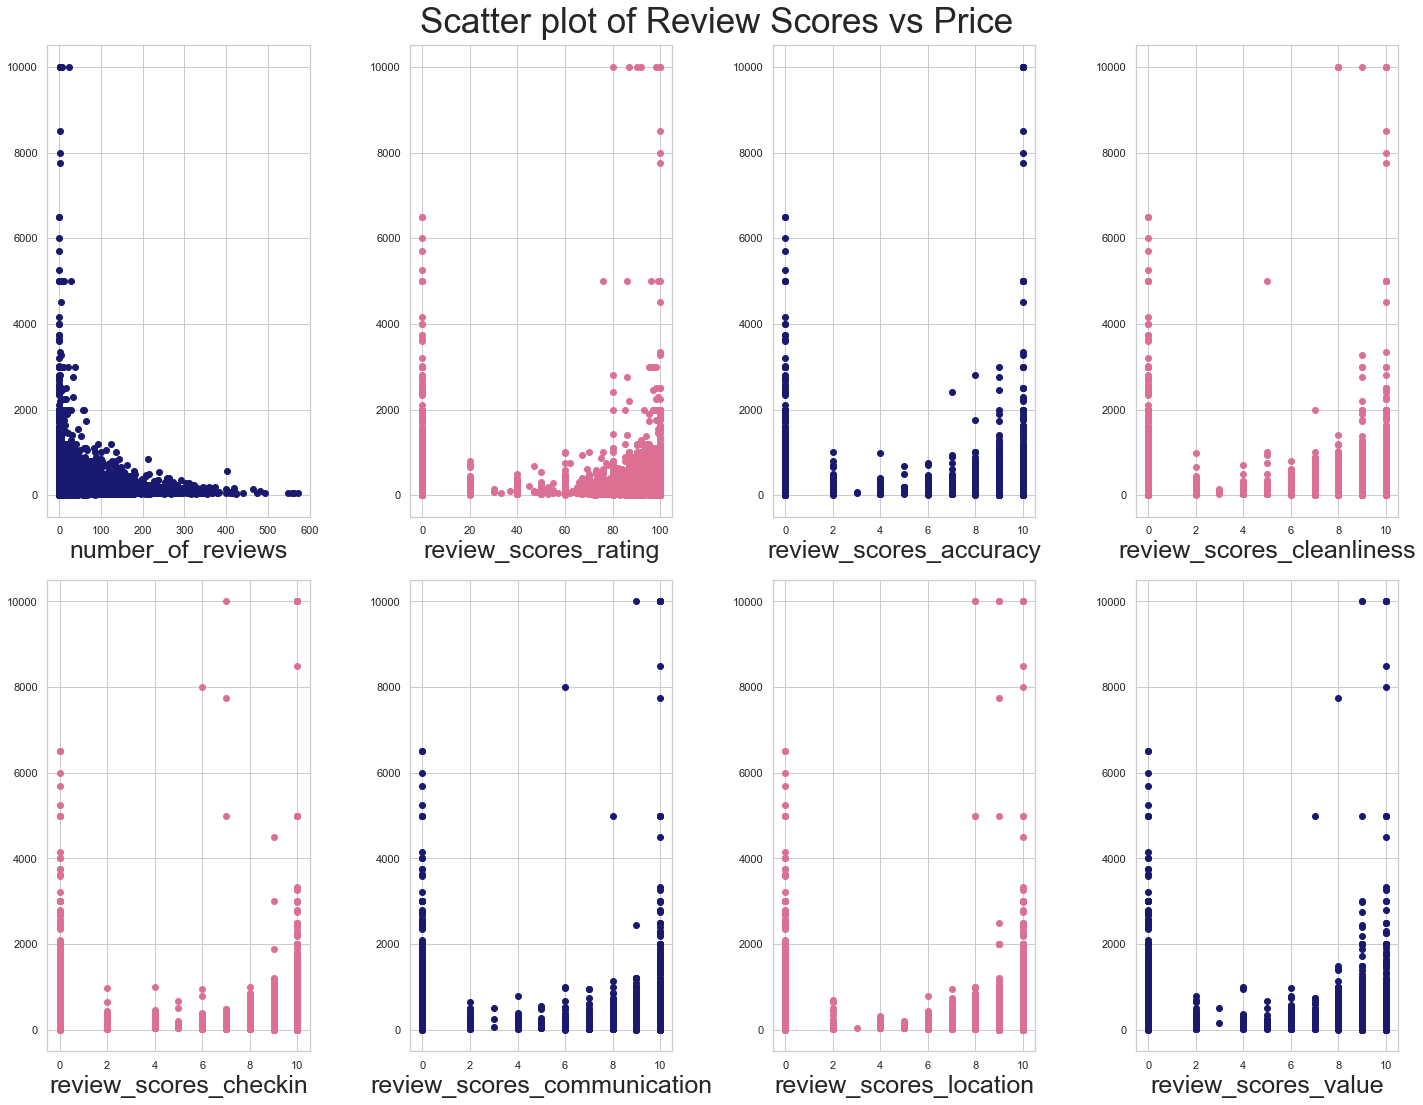

In [22]:
fig, ((ax1, ax2, ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(nrows=2, ncols=4, figsize=(20,15))
axes=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
columns=['number_of_reviews','review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness', 
         'review_scores_checkin','review_scores_communication', 'review_scores_location','review_scores_value']
colors=['midnightblue','palevioletred','midnightblue','palevioletred','palevioletred','midnightblue',
        'palevioletred','midnightblue']

st = fig.suptitle("Scatter plot of Review Scores vs Price", fontsize=35)

for i in range(8):
    axes[i].scatter(x=columns[i], y='price', data=data,color=colors[i])
    axes[i].set_xlabel(columns[i],fontsize=25)
    
st.set_y(1.02)
fig.subplots_adjust(top=0.80)
plt.tight_layout()

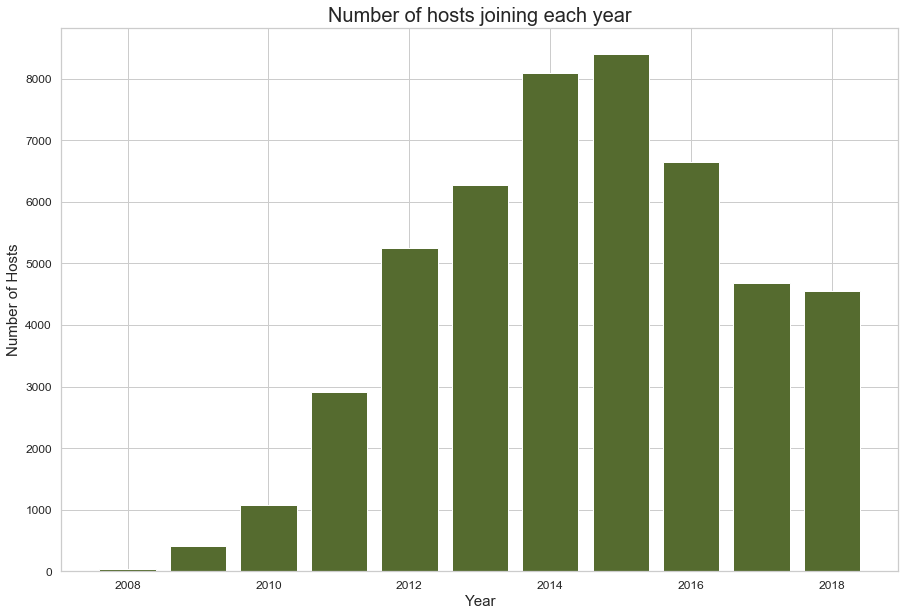

In [23]:
host_since=pd.to_datetime(data['host_since'], format='%Y-%m-%d')
host_year=(host_since.apply(lambda x: x.year)).values

host_year_dict={}
for year in host_year:
    if year in host_year_dict:
        host_year_dict[year]+=1
    else:
        host_year_dict[year]=1

plt.figure(figsize=(15,10))        
plt.title('Number of hosts joining each year', fontsize=20)
plt.bar(host_year_dict.keys(),host_year_dict.values(), color='darkolivegreen')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Hosts', fontsize=15)
plt.tick_params(labelsize = 12)

* **Airbnb was established in August 2008. Source: https://en.wikipedia.org/wiki/Airbnb <br> That explains the lower number of hosts signing up in the first few years while Airbnb was getting more established. <br> We notice a sudden dip in the number of hosts sigining up after 2015, which could be attibuted to the fact that the market was already saturated by that point.**

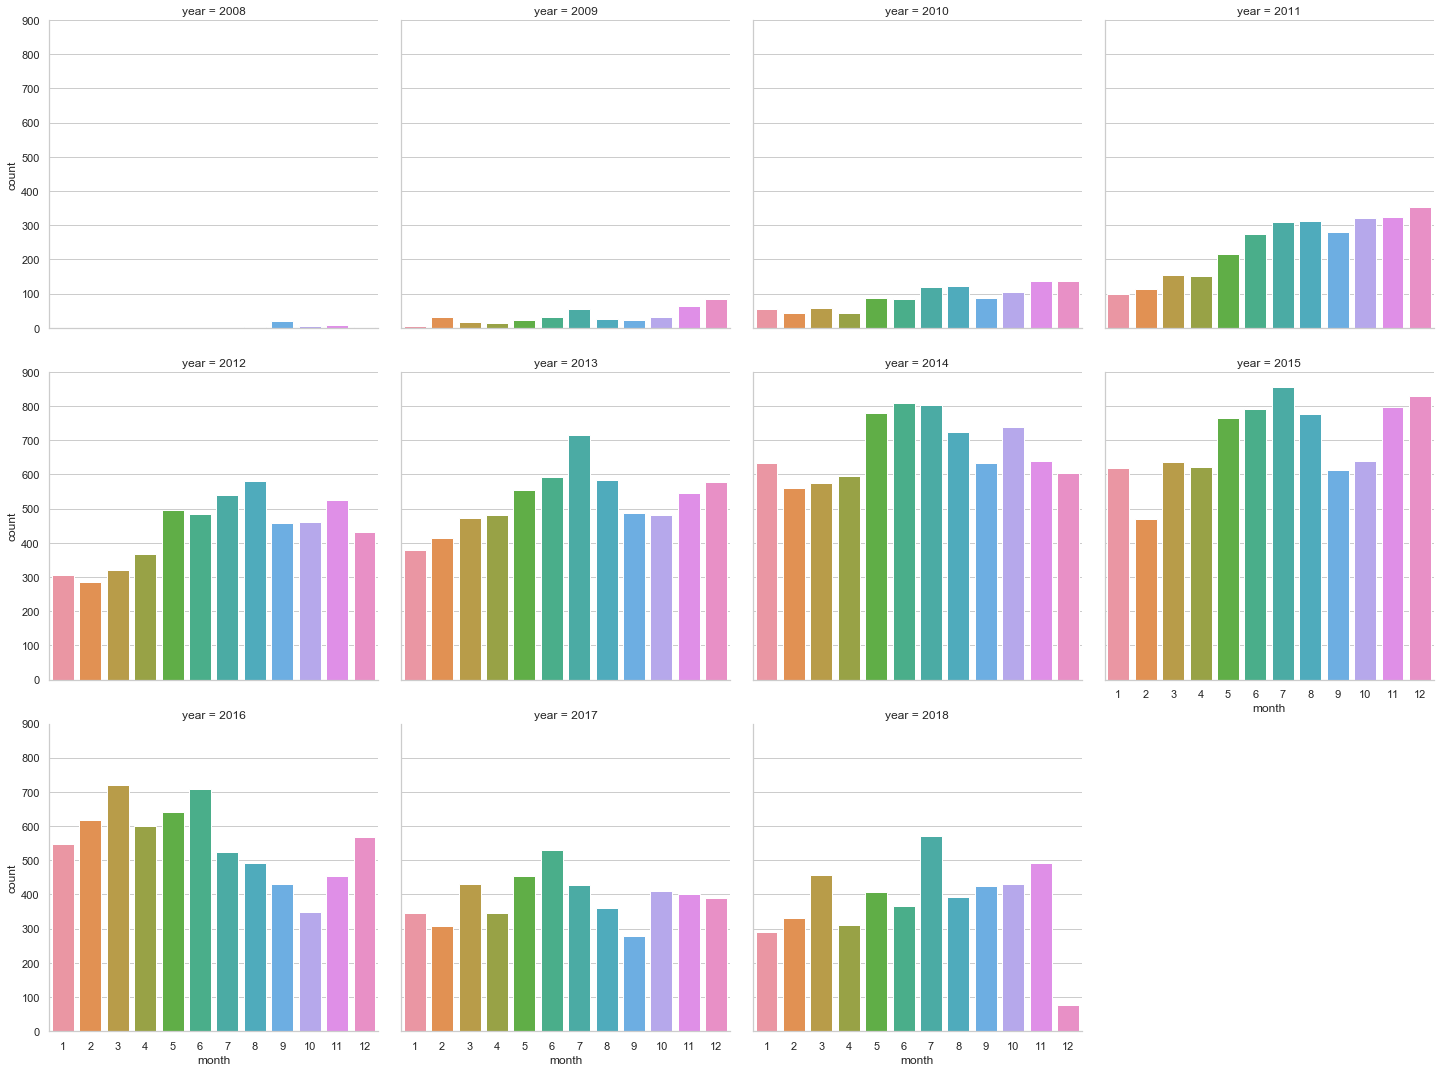

In [24]:
host_since=host_since.to_frame()
host_since['year']=host_since['host_since'].apply(lambda x: x.year)
host_since['month']=host_since['host_since'].apply(lambda x: x.month)

_=sns.catplot(x='month',col='year',data=host_since, kind='count',col_order=[2008,2009,2010,2011,2012,2013,2014,
                                                                             2015,2016,2017,2018], col_wrap=4)


* **The distribution of number of hosts signing up on Airbnb seems to be consistent through different months of the year. December, 2018 seems to have drastically low number of host sign ups, but thats because the data available was scraped until 6th December 2018 and thus, that is data only for six days from that month.**